# Frequent Itemsets and Association Rules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import fpgrowth, fpmax, association_rules


## (a)

In [2]:
data = pd.read_csv('./frequent_itemsets_and_association_rules/online_retail.csv', sep=';', decimal=',')
display(data.head())
display(data.info())

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536370,ALARM CLOCK BAKELIKE PINK,24,01.12.2010 08:45,3.75,12583.0,France
1,536370,ALARM CLOCK BAKELIKE RED,24,01.12.2010 08:45,3.75,12583.0,France
2,536370,ALARM CLOCK BAKELIKE GREEN,12,01.12.2010 08:45,3.75,12583.0,France
3,536370,PANDA AND BUNNIES STICKER SHEET,12,01.12.2010 08:45,0.85,12583.0,France
4,536370,STARS GIFT TAPE,24,01.12.2010 08:45,0.65,12583.0,France


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29313 entries, 0 to 29312
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BillNo      29313 non-null  int64  
 1   Itemname    29313 non-null  object 
 2   Quantity    29313 non-null  int64  
 3   Date        29313 non-null  object 
 4   Price       29313 non-null  float64
 5   CustomerID  29208 non-null  float64
 6   Country     29313 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 1.6+ MB


None

Total sales value:  983566.6499999999

The top tree items with the heighest sales value: 
 Itemname
POSTAGE                     59489.5
REGENCY CAKESTAND 3 TIER    18961.8
RABBIT NIGHT LIGHT          18836.0
Name: Sales, dtype: float64



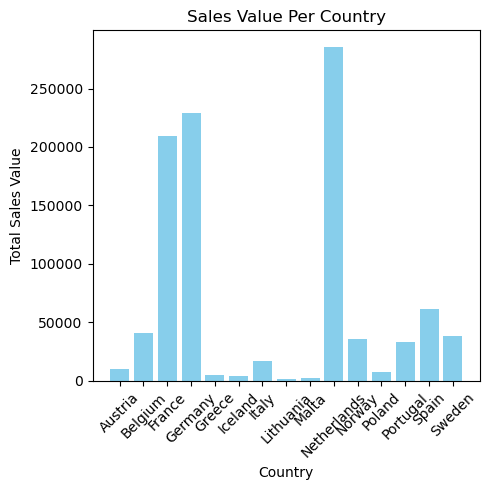

       Quantity  Price Itemname      Country  Sales
19            3   18.0  POSTAGE       France   54.0
21            1   15.0  POSTAGE  Netherlands   15.0
36            1   18.0  POSTAGE      Germany   18.0
120           1   18.0  POSTAGE      Germany   18.0
127           1   18.0  POSTAGE       France   18.0
...         ...    ...      ...          ...    ...
29215         1   15.0  POSTAGE      Belgium   15.0
29233         2   18.0  POSTAGE      Germany   36.0
29246         1   18.0  POSTAGE      Germany   18.0
29259         2   18.0  POSTAGE      Germany   36.0
29260         3   18.0  POSTAGE      Germany   54.0

[983 rows x 5 columns]
       Quantity  Price                  Itemname      Country   Sales
252           2  12.75  REGENCY CAKESTAND 3 TIER       France   25.50
393           4  12.75  REGENCY CAKESTAND 3 TIER      Germany   51.00
901          32  10.95  REGENCY CAKESTAND 3 TIER      Germany  350.40
980          10  12.75  REGENCY CAKESTAND 3 TIER        Spain  127.50
11

In [3]:
# Your code here

# monetary value
monetaryValueData = data[['Quantity', 'Price', 'Itemname', 'Country']].copy()
monetaryValueData['Sales'] = monetaryValueData['Quantity']*monetaryValueData['Price']
monetaryValue = monetaryValueData['Sales'].sum()

print("Total sales value: ", monetaryValue)
print()

# items with the highest sales value
highestSales = monetaryValueData.groupby('Itemname')['Sales'].sum().nlargest(3)

print("The top tree items with the heighest sales value: \n",  highestSales)
print()

# plot showing the sales value per country
CountrySales = monetaryValueData.groupby('Country')['Sales'].sum().reset_index()

plt.figure(figsize=(5, 5))
plt.bar(CountrySales['Country'], CountrySales['Sales'], color='skyblue')

plt.xlabel('Country')
plt.ylabel('Total Sales Value')
plt.title('Sales Value Per Country')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


print(monetaryValueData[monetaryValueData['Itemname'] == "POSTAGE"])
print(monetaryValueData[monetaryValueData['Itemname'] == "REGENCY CAKESTAND 3 TIER"])

## (b)

In [11]:
# Create a transaction for each BillNo
transactions = data.groupby(['BillNo', 'Itemname'])['Quantity'].sum().unstack().fillna(0).astype(bool)
transaction_attributes = data.groupby('BillNo')[['Date', 'CustomerID', 'Country']].first()
display(transactions.head())
display(transaction_attributes.head())
n_transactions = transactions.shape[0]

Itemname,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,...,ZINC FOLKART SLEIGH BELLS,ZINC HEART FLOWER T-LIGHT HOLDER,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER
BillNo,,,,,,,,,,,,,,,,,,,,,
536370,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536403,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536527,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536532,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536840,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


,Date,CustomerID,Country
BillNo,,,
536370,01.12.2010 08:45,12583.0,France
536403,01.12.2010 11:27,12791.0,Netherlands
536527,01.12.2010 13:04,12662.0,Germany
536532,01.12.2010 13:24,12433.0,Norway
536840,02.12.2010 18:27,12738.0,Germany


Number of transactions:  1357

Three most common itmes with their count: 
 Itemname
POSTAGE                               983
ROUND SNACK BOXES SET OF4 WOODLAND    266
REGENCY CAKESTAND 3 TIER              186
dtype: int64

The support of the three common items: 
POSTAGE 0.7243920412675019
ROUND SNACK BOXES SET OF4 WOODLAND 0.19602063375092116
REGENCY CAKESTAND 3 TIER 0.13706705969049374



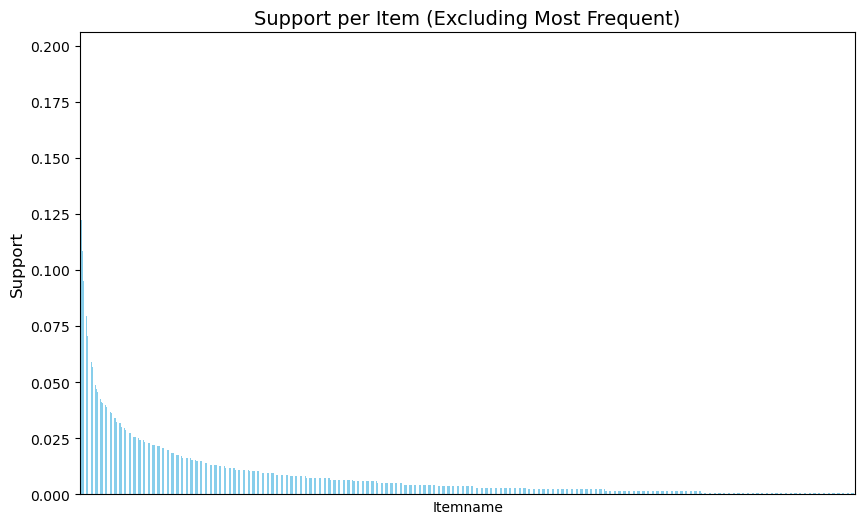

In [5]:
# Your code here
# number of transactions
print("Number of transactions: ", n_transactions)
print()

# three most common items
commonItems = transactions.sum().sort_values(ascending=False).head(3)
print("Three most common itmes with their count: \n", commonItems)
print()

itemNames = commonItems.index.tolist()
print("The support of the three common items: ")
for item, count in zip(itemNames, commonItems):
    print(item, count / n_transactions)
print()

# bar chart support per item
item_support = transactions.sum() / n_transactions
item_support_sorted = item_support.sort_values(ascending=False).iloc[1:]
#item_support_sorted = item_support_sorted.iloc[1:]

plt.figure(figsize=(10, 6))
item_support_sorted.plot(kind='bar', color='skyblue')
plt.xticks([]) 
plt.title('Support per Item (Excluding Most Frequent)', fontsize=14)
plt.ylabel('Support', fontsize=12)
plt.show()

## (c)
The three most frequently ocurring items across all transactions differ from the tree items that generat the highest sales values. This is because a more expensive item can generate a higher sales value, even with less buys, than a cheaper item with a higher buy frequency.


## (d)

In [6]:
# Your code here

# calculate frequent itemset
frequentItemsets = fpgrowth(transactions, min_support=0.01, use_colnames=True)
print("all frequent itemsets with a minimum support of 1% \n")
print(frequentItemsets)

# the three most frequent itemsets, which have at least three items
frequentItemsetsFiltered = frequentItemsets[frequentItemsets['itemsets'].apply(len) >= 3]
frequentItemsetsTopThree = frequentItemsetsFiltered.sort_values(by='support', ascending=False).head(3)
print("the three most frequent itemsets which include at least three items are ,\n", frequentItemsetsTopThree)

all frequent itemsets with a minimum support of 1% 

       support                                           itemsets
0     0.724392                                          (POSTAGE)
1     0.196021               (ROUND SNACK BOXES SET OF4 WOODLAND)
2     0.121592                               (SPACEBOY LUNCH BOX)
3     0.117907                    (RED TOADSTOOL LED NIGHT LIGHT)
4     0.070744                        (ALARM CLOCK BAKELIKE PINK)
...        ...                                                ...
4103  0.018423  (MINI LIGHTS WOODLAND MUSHROOMS, POSTAGE, RABB...
4104  0.013265  (MINI LIGHTS WOODLAND MUSHROOMS, RABBIT NIGHT ...
4105  0.010317  (MINI LIGHTS WOODLAND MUSHROOMS, POSTAGE, RED ...
4106  0.014738           (POSTAGE, TRADTIONAL ALPHABET STAMP SET)
4107  0.011054  (RABBIT NIGHT LIGHT, TRADTIONAL ALPHABET STAMP...

[4108 rows x 2 columns]
the three most frequent itemsets which include at least three items are ,
        support                                         

## (e)

In [7]:
# Your code here

# maximal frequent itemsets with a minimum support of 1%
maxFrequentItemset = fpmax(transactions, min_support=0.01, use_colnames=True)
print("all maximal frequent itemsets with a minimum support of 1% \n")
print(maxFrequentItemset)

# the three most maximum frequent itemsets, which have at least three items
maxFrequentItemsetsFiltered = maxFrequentItemset[maxFrequentItemset['itemsets'].apply(len) >= 3]
maxFrequentItemsetsTopThree = maxFrequentItemsetsFiltered.sort_values(by='support', ascending=False).head(3)
print("the three most frequent itemsets which include at least three items are, \n", maxFrequentItemsetsTopThree)

# compare the three most frequent maximal itemsets including at least three items and their support to the resulting itemsets of part d)
print("""as d) considers frequent itemsets, it is possible that itemsets are considered that are not maximal. Hence these can not be considered in e). As maximal frequent itemsets are most often
        larger than frequent itemsets the most often have also a lower support. This can be seen, when comparing the top three itemsets of d) and e). Even if they both have exactly three items,
        the support of the itemset in d) is higher. As the support in e) is lower for each itemset, it can be assumed that the top three itemset in d) are not maximal and can be found in a larger
        frequent itemset.""")



all maximal frequent itemsets with a minimum support of 1% 

       support                                           itemsets
0     0.010317                (SET 20 NAPKINS FAIRY CAKES DESIGN)
1     0.010317                         (GINGHAM HEART DECORATION)
2     0.010317                       (TRADITIONAL MODELLING CLAY)
3     0.010317                         (HOME BUILDING BLOCK WORD)
4     0.010317                (FOLDING BUTTERFLY MIRROR HOT PINK)
...        ...                                                ...
2026  0.011054  (PLASTERS IN TIN CIRCUS PARADE, ROUND SNACK BO...
2027  0.012528  (PLASTERS IN TIN CIRCUS PARADE, POSTAGE, REGEN...
2028  0.012528  (PLASTERS IN TIN CIRCUS PARADE, POSTAGE, REGEN...
2029  0.010317  (ROUND SNACK BOXES SET OF 4 FRUITS, POSTAGE, R...
2030  0.013265  (ROUND SNACK BOXES SET OF4 WOODLAND, POSTAGE, ...

[2031 rows x 2 columns]
the three most frequent itemsets which include at least three items are, 
        support                                 

## (f)

In [35]:
# Your code here


## (g)

                                            antecedents  \
0                  (ROUND SNACK BOXES SET OF4 WOODLAND)   
1                                  (SPACEBOY LUNCH BOX)   
2     (SPACEBOY LUNCH BOX, ROUND SNACK BOXES SET OF4...   
3     (ROUND SNACK BOXES SET OF 4 FRUITS, SPACEBOY L...   
4     (ROUND SNACK BOXES SET OF 4 FRUITS, SPACEBOY L...   
...                                                 ...   
3083                   (MINI LIGHTS WOODLAND MUSHROOMS)   
3084  (MINI LIGHTS WOODLAND MUSHROOMS, RABBIT NIGHT ...   
3085  (MINI LIGHTS WOODLAND MUSHROOMS, RED TOADSTOOL...   
3086  (MINI LIGHTS WOODLAND MUSHROOMS, RED TOADSTOOL...   
3087                    (TRADTIONAL ALPHABET STAMP SET)   

                               consequents  antecedent support  \
0                                (POSTAGE)            0.196021   
1                                (POSTAGE)            0.121592   
2                                (POSTAGE)            0.064849   
3     (ROUND SNACK BOXES SE

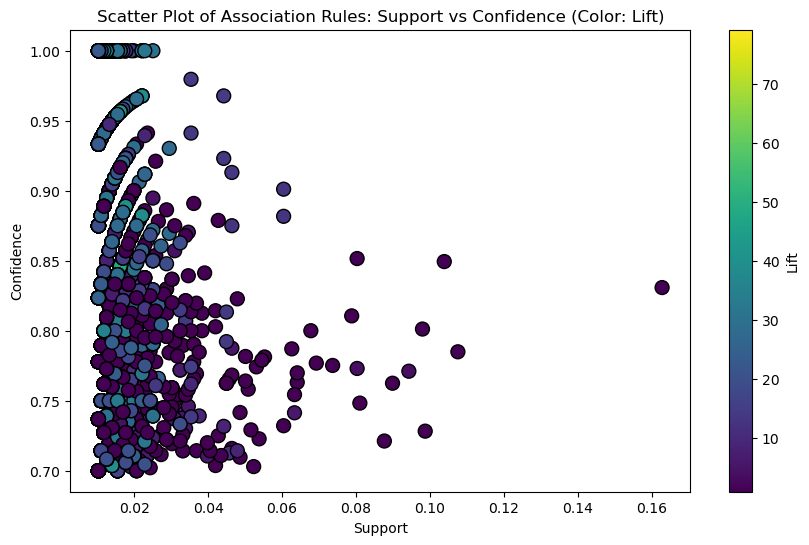

In [36]:
# Your code here
from mlxtend.frequent_patterns import association_rules
# determine all association rules based on frequentItemsets
#associationRules = mlxtend.association_rules(frequentItemsets, metric="confidence", min_threshold=0.5)
associationRules = association_rules(frequentItemsets, metric="confidence", min_threshold=0.7, num_itemsets= n_transactions)
print(associationRules)

# plot
plt.figure(figsize=(10, 6))
plt.scatter(associationRules['support'], associationRules['confidence'], c=associationRules['lift'], cmap='viridis', edgecolors='k', s=100)
plt.colorbar(label='Lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Scatter Plot of Association Rules: Support vs Confidence (Color: Lift)')
plt.show()

## (h)

In [37]:
# Your code here
associationRulesCopy = associationRules.copy()

# association rule with the highest lift
highestLift = associationRulesCopy.sort_values(by='lift', ascending=False).head(1)
print("Association Rule with highest Lift")
print("Antecedents: ", ', '.join(str(item) for item in highestLift['antecedents']), " Consequents: ", ', '.join(map(str, highestLift['consequents'])), "Lift: ", highestLift['lift'])
print("Support: ", highestLift['support'])
print("Confidence: ", highestLift['confidence'])
print("------")

# association rule with the lowest lift
print("Association Rule with lowest Lift")
lowestLift = associationRulesCopy.sort_values(by='lift', ascending=True).head(1)
print("Antecedents: ", ', '.join(str(item) for item in lowestLift['antecedents']), " Consequents: ", ', '.join(map(str, lowestLift['consequents'])), "Lift: ", lowestLift['lift'])
print("Support: ", lowestLift['support'])
print("Confidence: ", lowestLift['confidence'])

Association Rule with highest Lift
Antecedents:  frozenset({'DOLLY GIRL CHILDRENS BOWL', 'CHILDRENS CUTLERY DOLLY GIRL'})  Consequents:  frozenset({'CHILDRENS CUTLERY SPACEBOY', 'DOLLY GIRL CHILDRENS CUP'}) Lift:  2956    79.158333
Name: lift, dtype: float64
Support:  2956    0.010317
Name: support, dtype: float64
Confidence:  2956    0.875
Name: confidence, dtype: float64
------
Association Rule with lowest Lift
Antecedents:  frozenset({'CARD CIRCUS PARADE', 'PLASTERS IN TIN CIRCUS PARADE'})  Consequents:  frozenset({'POSTAGE'}) Lift:  485    0.966328
Name: lift, dtype: float64
Support:  485    0.010317
Name: support, dtype: float64
Confidence:  485    0.7
Name: confidence, dtype: float64


## (i)

In [ ]:
# Your code here

print(""" As a minimum lift value 1 would be recommended, as a value less than 1 represents a negative corraltion. These are not interesting for the retailer. A value greater 1 represents a positive
        correlation. """)
print(""" As minimum confidence 

## (j)

In [ ]:
# Your code here